<a href="https://colab.research.google.com/github/jialinli-21/Li_DSPN_S25/blob/main/Exercise16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 16: Model selection

This homework is designed to give you practice implementing model selection techniques, including best subset selection and forward/backward stepwise selection.

You won't need to load in any data for this homework, we will be simulating our own.

---
## 1. Best subset selection (4 points)

In this question, we will first generate simulated data, and then use it to perform best subset selection.

a) Use `rnorm()` to generate a dataset including a predictor $X$ of length $n = 100$ and a noise vector $\epsilon$ of length $n = 100$. Generate data for a response variable $Y$ of length $n = 100$ according to the model

$Y = \beta_0 + \beta_1X + \beta_2X^2 + \beta_3X^3 + \epsilon$

where $\beta_0$, $\beta_1$, $\beta_2$, and $\beta_3$ are constants of your choice.


In [72]:

set.seed(15)
n = 100
beta_0 = 1
beta_1 = 2
beta_2 = 3
beta_3 = 4
simulate_data <- function(sample_size, beta_0, beta_1, beta_2, beta_3) {
      #generate x
      x = rnorm(sample_size)
      epsilon = rnorm(sample_size)
      # generate y
      y = beta_0 + beta_1*x + beta_2 * (x^2) + beta_3 * (x^3) + epsilon


      return (data.frame(
        y = y,
        x = x
      ))

}

data <- simulate_data(n,  beta_0, beta_1, beta_2, beta_3)
head(data)



,y,x
,<dbl>,<dbl>
1,1.7479413,0.2588229
2,39.2506067,1.8311207
3,-0.6979822,-0.3396186
4,9.5634794,0.8971982
5,4.2345246,0.4880163
6,-5.0314842,-1.2553858


b) Use `regsubsets()` to perform best subset selection to determine the best model that contains the predictor variables $X$, $X^2$, . . . , $X^{10}$. Print the model summary.

In [4]:
install.packages("leaps")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [74]:
library(leaps)


In [75]:
library(dplyr)
library(leaps)

data <- data %>%
  mutate(
    x2 = x^2,
    x3 = x^3,
    x4 = x^4,
    x5 = x^5,
    x6 = x^6,
    x7 = x^7,
    x8 = x^8,
    x9 = x^9,
    x10 = x^10
  )

# head(data)

regfit.full <- regsubsets(
  y ~ .,
  data = select(data, y, x, x2, x3, x4, x5, x6, x7, x8, x9, x10)
)

reg.summary = summary(regfit.full)
reg.summary

Subset selection object
Call: regsubsets.formula(y ~ ., data = select(data, y, x, x2, x3, x4, 
    x5, x6, x7, x8, x9, x10))
10 Variables  (and intercept)
    Forced in Forced out
x       FALSE      FALSE
x2      FALSE      FALSE
x3      FALSE      FALSE
x4      FALSE      FALSE
x5      FALSE      FALSE
x6      FALSE      FALSE
x7      FALSE      FALSE
x8      FALSE      FALSE
x9      FALSE      FALSE
x10     FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: exhaustive
         x   x2  x3  x4  x5  x6  x7  x8  x9  x10
1  ( 1 ) " " " " "*" " " " " " " " " " " " " " "
2  ( 1 ) " " "*" "*" " " " " " " " " " " " " " "
3  ( 1 ) "*" "*" "*" " " " " " " " " " " " " " "
4  ( 1 ) "*" "*" "*" " " " " "*" " " " " " " " "
5  ( 1 ) "*" "*" "*" " " "*" "*" " " " " " " " "
6  ( 1 ) "*" " " "*" "*" " " "*" " " "*" " " "*"
7  ( 1 ) "*" "*" "*" "*" " " "*" " " "*" " " "*"
8  ( 1 ) "*" "*" "*" "*" "*" "*" " " "*" " " "*"

c) Plot the Mallows' Cp, Bayesian Information Criteria (BIC) and the adjusted coefficient of determination, $R^2$, for each model tested. Which is the best model? Report the coefficients of the best model.

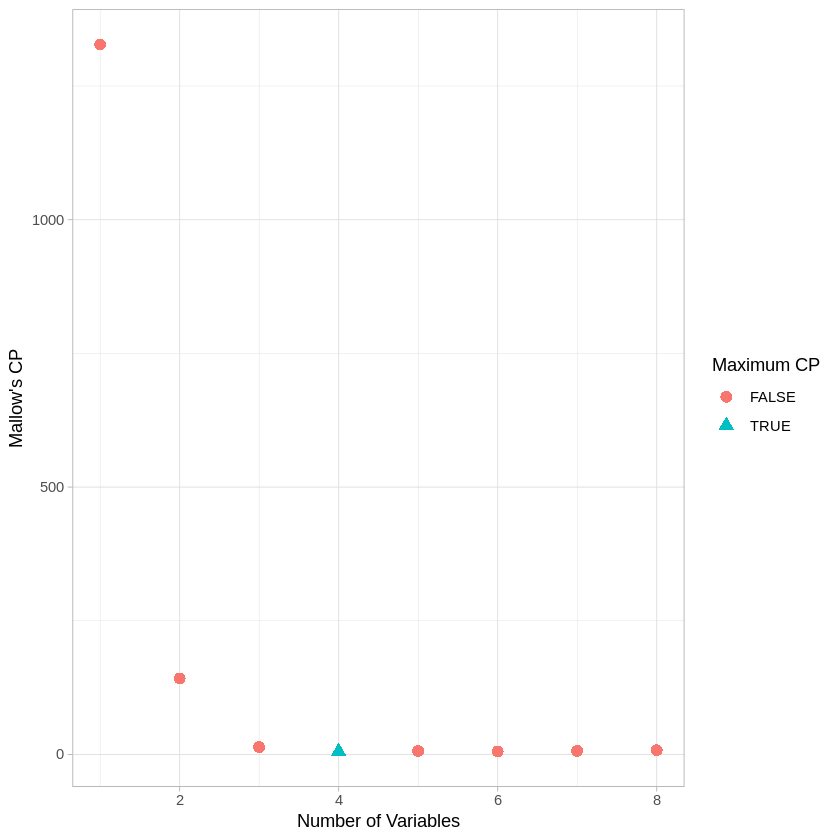

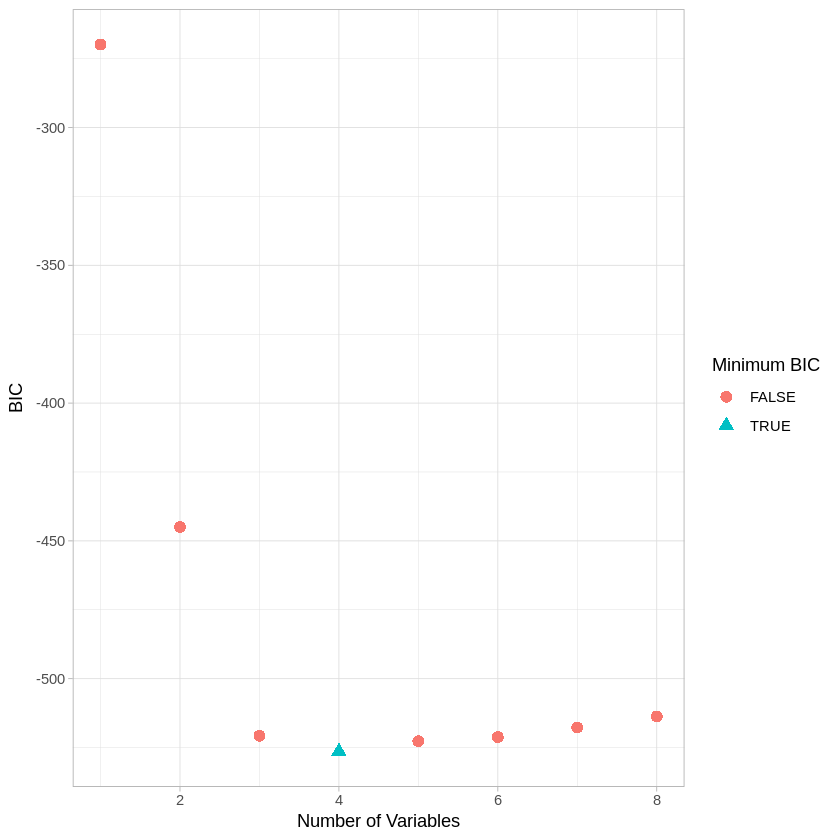

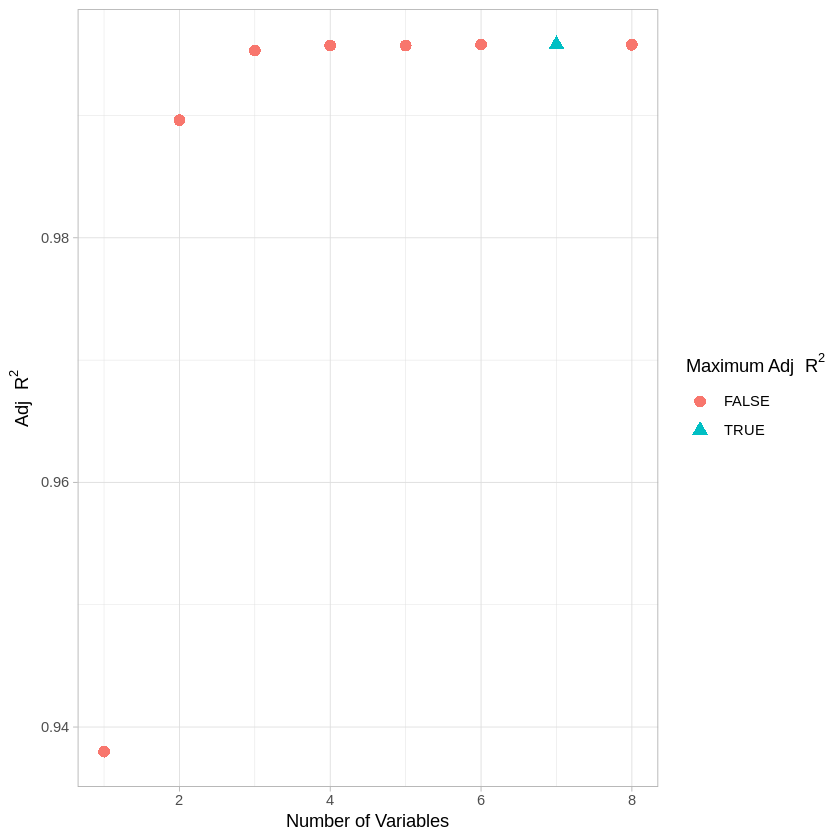

In [76]:

numvar = 1:length(reg.summary$rss)
allfalse = rep(FALSE,length(reg.summary$rss))

#mallow's cp
cp.df <- data.frame(numvar = numvar, cp <- reg.summary$cp, mincp <- allfalse)
cp.df$mincp[which.min(reg.summary$cp)] <- TRUE
ggplot(cp.df,aes(x=numvar,y=cp,shape=mincp,col=mincp)) +
    geom_point(size=3) + theme_light() +
    labs(x = "Number of Variables", y = "Mallow's CP", color="Maximum CP", shape="Maximum CP")


# #bic
bic.df <- data.frame(numvar = numvar,bic <- reg.summary$bic, minbic <- allfalse)
bic.df$minbic[which.min(reg.summary$bic)] <- TRUE
ggplot(bic.df,aes(x=numvar,y=bic,shape=minbic,col=minbic)) +
    geom_point(size=3) + theme_light() +
    labs(x = "Number of Variables", y = "BIC", color="Minimum BIC", shape="Minimum BIC")
#adjr2
adjr2.df <- data.frame(numvar = numvar, adjr2 <- reg.summary$adjr2, maxadjr2 <- allfalse)
adjr2.df$maxadjr2[which.max(reg.summary$adjr2)] <- TRUE
ggplot(adjr2.df,aes(x=numvar,y=adjr2,shape=maxadjr2,col=maxadjr2)) +
    geom_point(size=3) + theme_light() +
    labs(x = "Number of Variables", y = 'Adj'~R^2, color='Maximum Adj'~R^2, shape='Maximum Adj'~R^2)



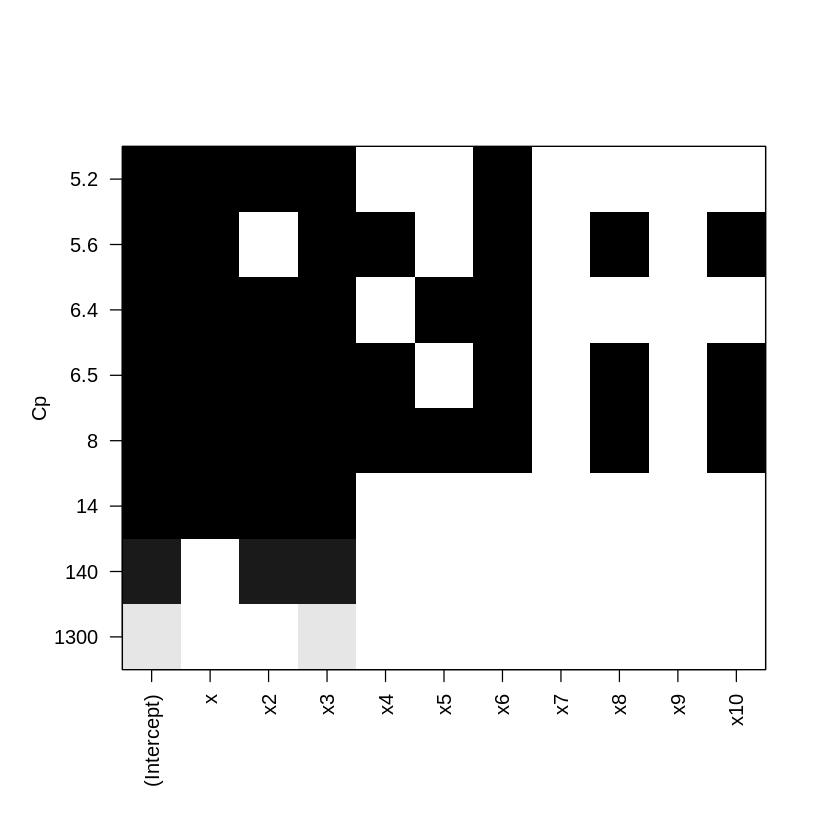

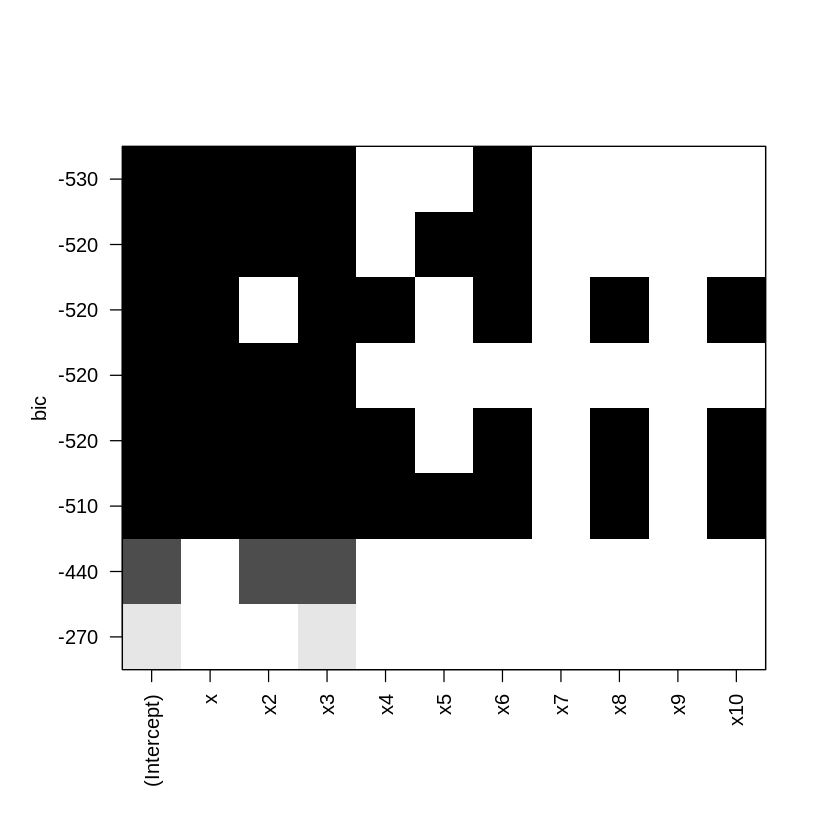

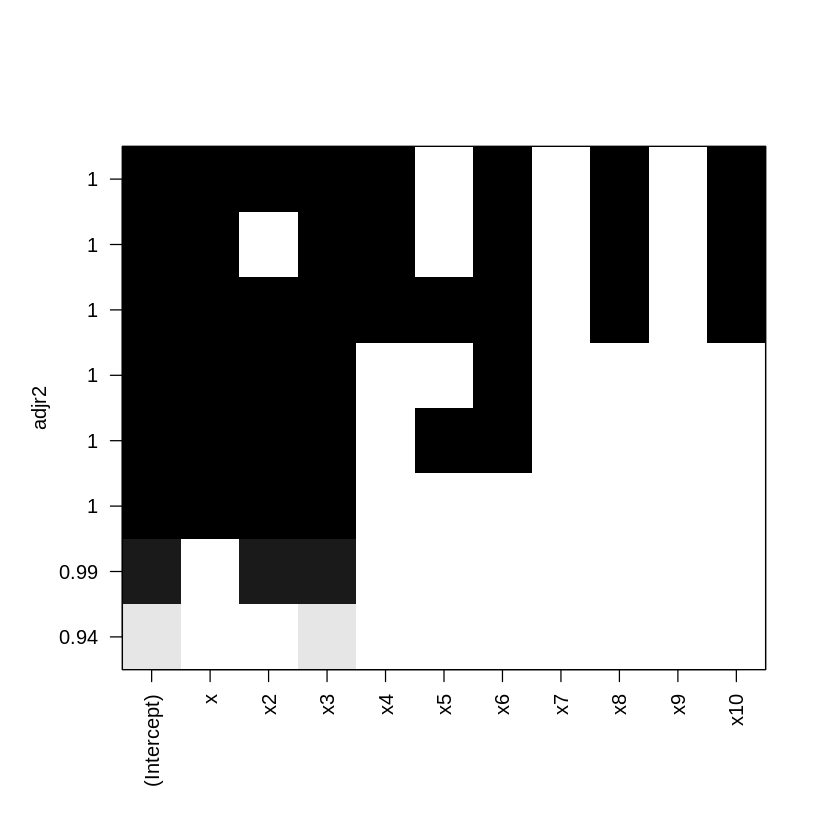

In [77]:
plot(regfit.full, scale="Cp") #Mallow's Cp
plot(regfit.full, scale="bic") #BIC
plot(regfit.full, scale="adjr2") #adjusted R^2

In [78]:
# identify which model has the best bias-adjusted fit
which.min(reg.summary$bic)
which.max(reg.summary$adjr2)
which.min(reg.summary$cp)

[1] 4

[1] 7

[1] 4

In [79]:
#best model -- bic and cp
mod1 = lm(y ~ x + x2 + x3 + x6, data = data)
summary(mod1)
summary(mod1)$coefficients


Call:
lm(formula = y ~ x + x2 + x3 + x6, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.3435 -0.6289  0.1028  0.7276  2.4280 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.569612   0.152536   3.734 0.000321 ***
x            2.031967   0.186485  10.896  < 2e-16 ***
x2           3.500866   0.154192  22.705  < 2e-16 ***
x3           3.990805   0.060118  66.383  < 2e-16 ***
x6          -0.017301   0.005372  -3.220 0.001754 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.058 on 95 degrees of freedom
Multiple R-squared:  0.9959,	Adjusted R-squared:  0.9957 
F-statistic:  5760 on 4 and 95 DF,  p-value: < 2.2e-16


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),0.56961161,0.152535713,3.734284,3.209200e-04
x,2.03196689,0.186485445,10.896115,2.040752e-18
x2,3.50086631,0.154192301,22.704547,3.713342e-40
x3,3.99080549,0.060117502,66.383422,2.102262e-81
x6,-0.01730072,0.005372414,-3.220289,1.753567e-03


In [80]:
#best model -- r2
mod2 = lm(y ~ x + x2 + x3 +x4 + x6+x8+x10, data = data)
summary(mod2)
summary(mod2)$coefficients


Call:
lm(formula = y ~ x + x2 + x3 + x4 + x6 + x8 + x10, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.34476 -0.64380  0.09738  0.59793  2.43688 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.78998    0.22310   3.541 0.000628 ***
x            2.03229    0.18480  10.997  < 2e-16 ***
x2           1.31659    1.27187   1.035 0.303307    
x3           3.99963    0.06036  66.260  < 2e-16 ***
x4           3.40354    1.71524   1.984 0.050202 .  
x6          -1.83975    0.86254  -2.133 0.035592 *  
x8           0.38471    0.17763   2.166 0.032910 *  
x10         -0.02759    0.01265  -2.180 0.031811 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.049 on 92 degrees of freedom
Multiple R-squared:  0.9961,	Adjusted R-squared:  0.9958 
F-statistic:  3354 on 7 and 92 DF,  p-value: < 2.2e-16


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),0.78997778,0.22310055,3.540905,6.280016e-04
x,2.03229059,0.18480107,10.997180,1.874393e-18
x2,1.31658708,1.27186673,1.035161,3.033070e-01
x3,3.99962606,0.06036264,66.259962,1.941343e-79
x4,3.40354276,1.71523662,1.984299,5.020223e-02
x6,-1.83974566,0.86254223,-2.132934,3.559237e-02
x8,0.38471197,0.17762837,2.165825,3.291039e-02
x10,-0.02758752,0.01265488,-2.179991,3.181056e-02


> *Best model from BIC and Mallows' Cp contains x, x2, x3, and x6.*
> *Best model from adjusted r squared contains x, x2, x3,x4,x6,x8 and x10. Coefficients are reported above.*

---
## 2. Forward and backwards stepwise selection (3 points)

Using the same simulated data from question 1, use forward stepwise selection, and backwards stepwise selections to determine the best model. Again, for both model selection methods, plot the Mallows' Cp, Bayesian Information Criteria (BIC) and the adjusted coefficient of determination, $R^2$, for each model tested. Report the coefficients of the best model.

a) Forward stepwise selection:

In [81]:
regfit.forward = regsubsets(y ~ ., data = data, method = "forward")
regfit.forward.sum = summary(regfit.forward)
regfit.forward.sum


Subset selection object
Call: regsubsets.formula(y ~ ., data = data, method = "forward")
10 Variables  (and intercept)
    Forced in Forced out
x       FALSE      FALSE
x2      FALSE      FALSE
x3      FALSE      FALSE
x4      FALSE      FALSE
x5      FALSE      FALSE
x6      FALSE      FALSE
x7      FALSE      FALSE
x8      FALSE      FALSE
x9      FALSE      FALSE
x10     FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: forward
         x   x2  x3  x4  x5  x6  x7  x8  x9  x10
1  ( 1 ) " " " " "*" " " " " " " " " " " " " " "
2  ( 1 ) " " "*" "*" " " " " " " " " " " " " " "
3  ( 1 ) "*" "*" "*" " " " " " " " " " " " " " "
4  ( 1 ) "*" "*" "*" " " " " "*" " " " " " " " "
5  ( 1 ) "*" "*" "*" " " "*" "*" " " " " " " " "
6  ( 1 ) "*" "*" "*" " " "*" "*" "*" " " " " " "
7  ( 1 ) "*" "*" "*" " " "*" "*" "*" " " "*" " "
8  ( 1 ) "*" "*" "*" " " "*" "*" "*" "*" "*" " "

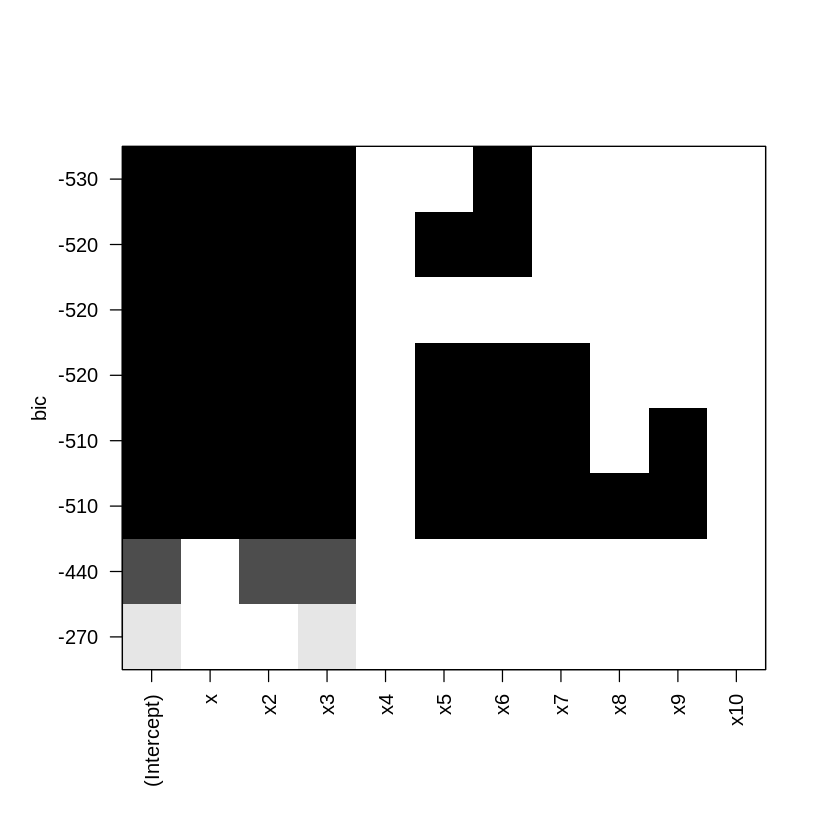

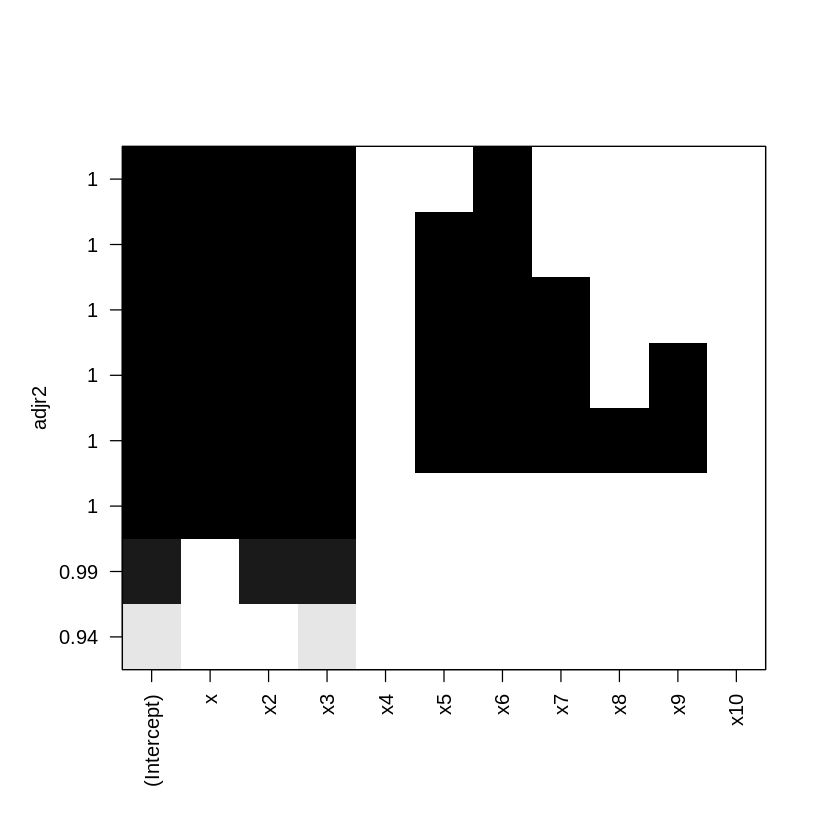

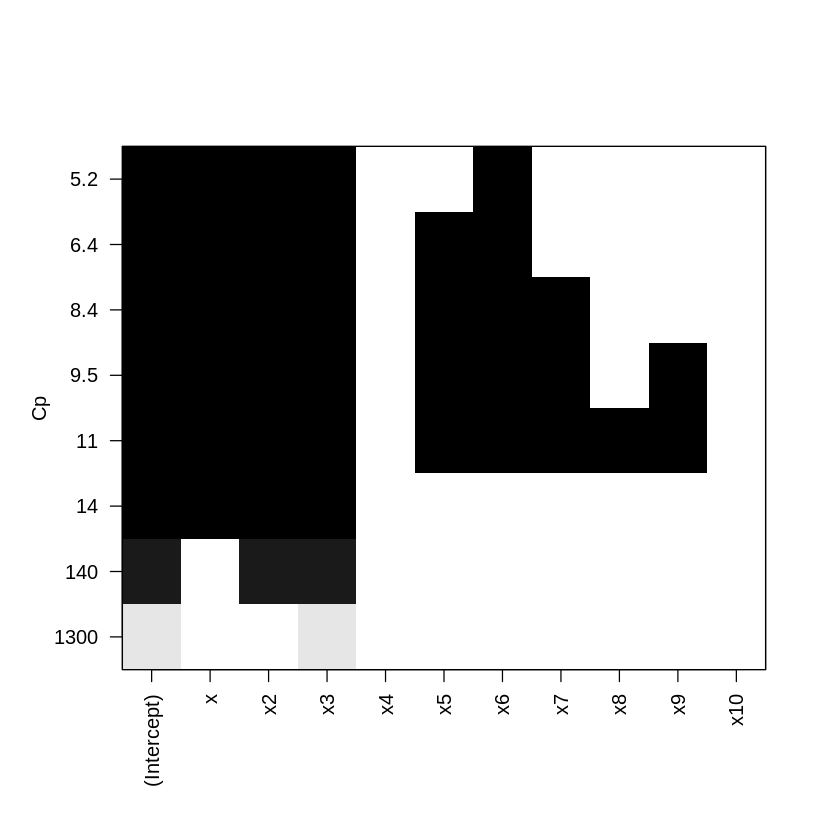

In [82]:
plot(regfit.forward, scale="bic")
plot(regfit.forward, scale="adjr2")
plot(regfit.forward, scale="Cp")

In [83]:
# identify which model has the best bias-adjusted fit
which.min(regfit.forward.sum$bic)
which.max(regfit.forward.sum$adjr2)
which.min(regfit.forward.sum$cp)

[1] 4

[1] 4

[1] 4

In [84]:
mod_forward = lm(y ~ x + x2 + x3+ x6, data = data)
summary(mod_forward)
summary(mod_forward)$coefficients


Call:
lm(formula = y ~ x + x2 + x3 + x6, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.3435 -0.6289  0.1028  0.7276  2.4280 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.569612   0.152536   3.734 0.000321 ***
x            2.031967   0.186485  10.896  < 2e-16 ***
x2           3.500866   0.154192  22.705  < 2e-16 ***
x3           3.990805   0.060118  66.383  < 2e-16 ***
x6          -0.017301   0.005372  -3.220 0.001754 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.058 on 95 degrees of freedom
Multiple R-squared:  0.9959,	Adjusted R-squared:  0.9957 
F-statistic:  5760 on 4 and 95 DF,  p-value: < 2.2e-16


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),0.56961161,0.152535713,3.734284,3.209200e-04
x,2.03196689,0.186485445,10.896115,2.040752e-18
x2,3.50086631,0.154192301,22.704547,3.713342e-40
x3,3.99080549,0.060117502,66.383422,2.102262e-81
x6,-0.01730072,0.005372414,-3.220289,1.753567e-03


b) Backwards stepwise selection:

In [85]:
regfit.backward = regsubsets(y ~ ., data = data, method = "backward")
regfit.backward.sum = summary(regfit.backward)
regfit.backward.sum


Subset selection object
Call: regsubsets.formula(y ~ ., data = data, method = "backward")
10 Variables  (and intercept)
    Forced in Forced out
x       FALSE      FALSE
x2      FALSE      FALSE
x3      FALSE      FALSE
x4      FALSE      FALSE
x5      FALSE      FALSE
x6      FALSE      FALSE
x7      FALSE      FALSE
x8      FALSE      FALSE
x9      FALSE      FALSE
x10     FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: backward
         x   x2  x3  x4  x5  x6  x7  x8  x9  x10
1  ( 1 ) " " " " "*" " " " " " " " " " " " " " "
2  ( 1 ) " " " " "*" "*" " " " " " " " " " " " "
3  ( 1 ) " " " " "*" "*" " " "*" " " " " " " " "
4  ( 1 ) "*" " " "*" "*" " " "*" " " " " " " " "
5  ( 1 ) "*" " " "*" "*" " " "*" " " "*" " " " "
6  ( 1 ) "*" " " "*" "*" " " "*" " " "*" " " "*"
7  ( 1 ) "*" " " "*" "*" " " "*" "*" "*" " " "*"
8  ( 1 ) "*" " " "*" "*" " " "*" "*" "*" "*" "*"

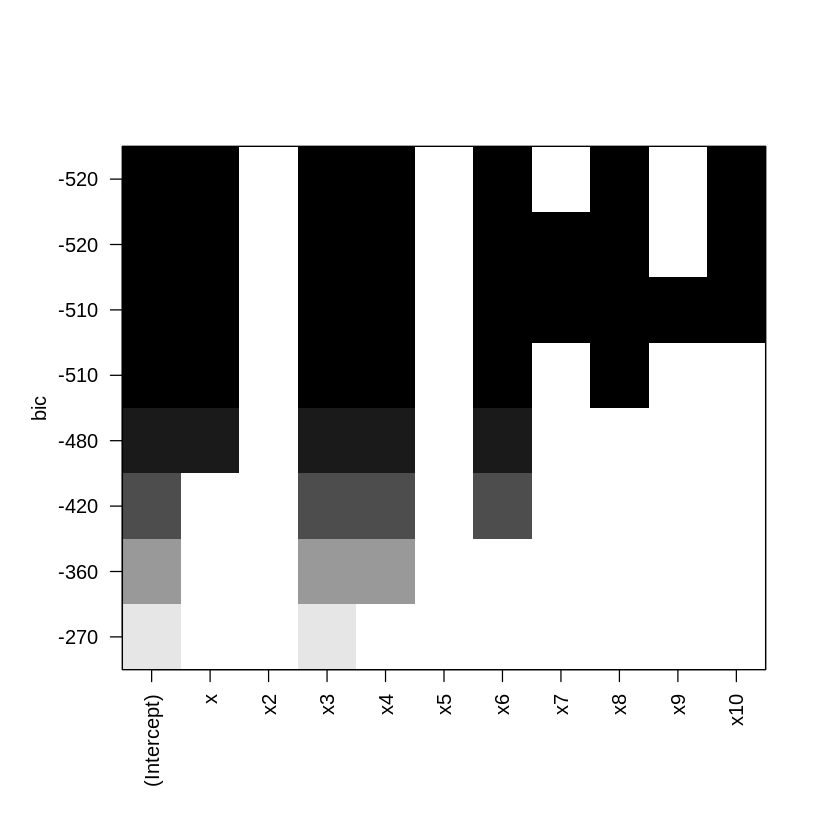

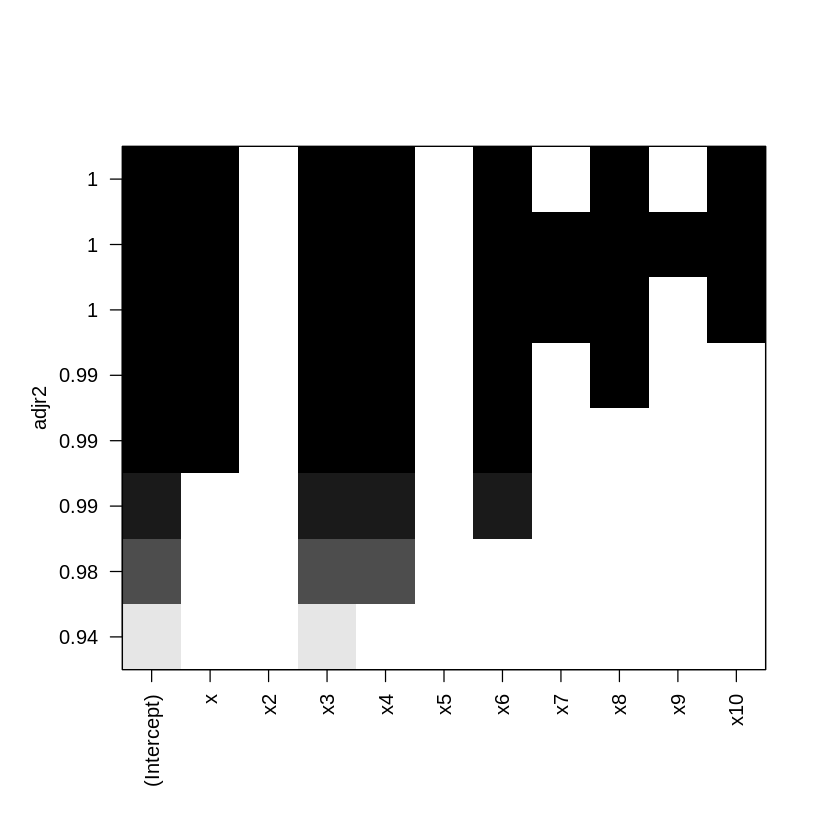

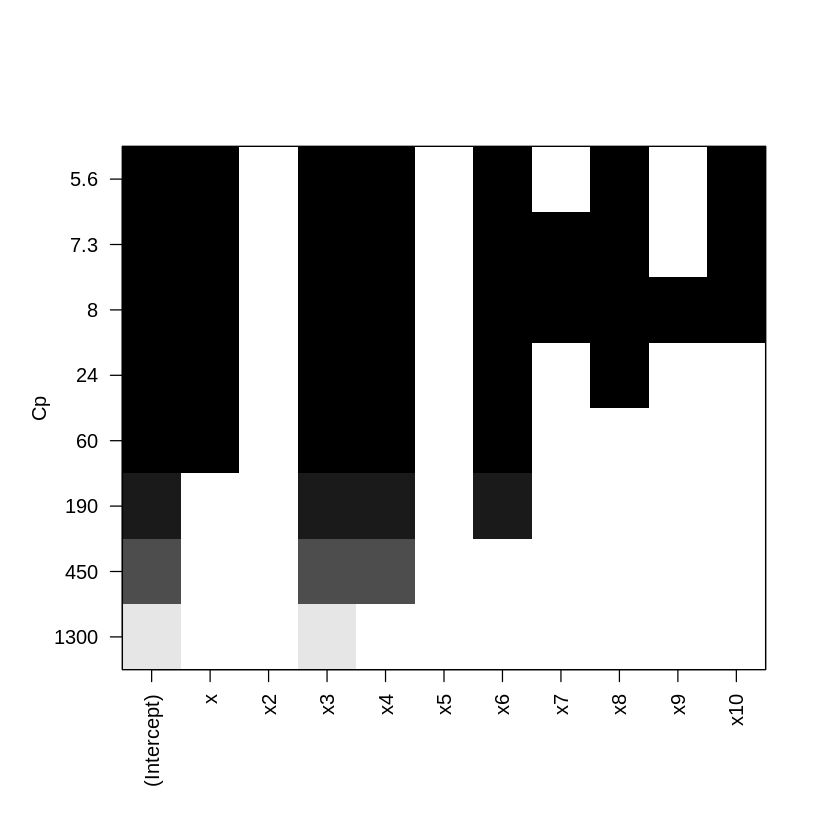

In [86]:
plot(regfit.backward, scale="bic")
plot(regfit.backward, scale="adjr2")
plot(regfit.backward, scale="Cp")

In [87]:
which.min(regfit.backward.sum$bic)
which.max(regfit.backward.sum$adjr2)
which.min(regfit.backward.sum$cp)

[1] 6

[1] 6

[1] 6

In [43]:
mod_backward = lm(y ~ x+ x3 + x4+ x6+x8+x10, data = data)
summary(mod_backward)
summary(mod_backward)$coefficients


Call:
lm(formula = y ~ x + x3 + x4 + x6 + x8 + x10, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.49425 -0.61781  0.03665  0.68225  2.46313 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.962461   0.148416   6.485 4.23e-09 ***
x            2.036188   0.184834  11.016  < 2e-16 ***
x3           4.002304   0.060330  66.340  < 2e-16 ***
x4           5.099913   0.506689  10.065  < 2e-16 ***
x6          -2.626848   0.407368  -6.448 5.00e-09 ***
x8           0.534233   0.103424   5.165 1.36e-06 ***
x10         -0.037498   0.008279  -4.529 1.75e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.049 on 93 degrees of freedom
Multiple R-squared:  0.9961,	Adjusted R-squared:  0.9958 
F-statistic:  3910 on 6 and 93 DF,  p-value: < 2.2e-16


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),0.96246058,0.148415642,6.484900,4.228268e-09
x,2.03618755,0.184833788,11.016317,1.489272e-18
x3,4.00230371,0.060330386,66.339767,4.056522e-80
x4,5.09991278,0.506688990,10.065174,1.491152e-16
x6,-2.62684824,0.407367723,-6.448347,4.995368e-09
x8,0.53423326,0.103423511,5.165491,1.360791e-06
x10,-0.03749812,0.008278746,-4.529444,1.752316e-05


c) Compare your results from parts a and b with those of question 1.

> *Forward selection: the best model from forward selection is the same as the best model from BIC and Mallows' Cp.*
>*Backward selection: the best model from Backward selection is similar to the best model from adjusted R squared. It only got rid of the x2 predictor.*

---
## 3. Training and test error (3 points)

This question will explore the relationship between training and test error and the number of features included in a model. We will again use a simulated dataset.

a) Simulate dataset with features $p = 20$ and observations $n = 1,000$. Generate data for a response variable $Y$ according to the model

$Y = X\beta + \epsilon$

where $\beta$ is random with some elements that are exactly zero.

Split your simulated dataset into a training set containing $n=100$ observations and a test set containing $n=900$ observations.

In [57]:
set.seed(15)


p <- 20
n <- 1000

beta <- rnorm(p)
beta[c(1, 3, 9, 11)] <- 0


x <- matrix(rnorm(n * p), nrow = n, ncol = p)
epsilon <- rnorm(n)
y <- x %*% beta + epsilon

index <- sample(seq(1000), 100, replace = FALSE)
train_x = x[index,]
test_x = x[-index,]

train_y = y[index,]
test_y = y[-index,]

training_set <- data.frame(train_x, train_y)
testing_set <- data.frame(test_x, test_y)


b) Perform best subset selection on the training set, and plot the associated training and test set MSE for the best model of each size.

In [60]:
training_fit = regsubsets(train_y ~ ., data = training_set, nvmax = p)
train_sum = summary(training_fit)
# train_sum
which.min(train_sum$bic)
which.max(train_sum$adjr2)
which.min(train_sum$cp)

[1] 12

[1] 16

[1] 13

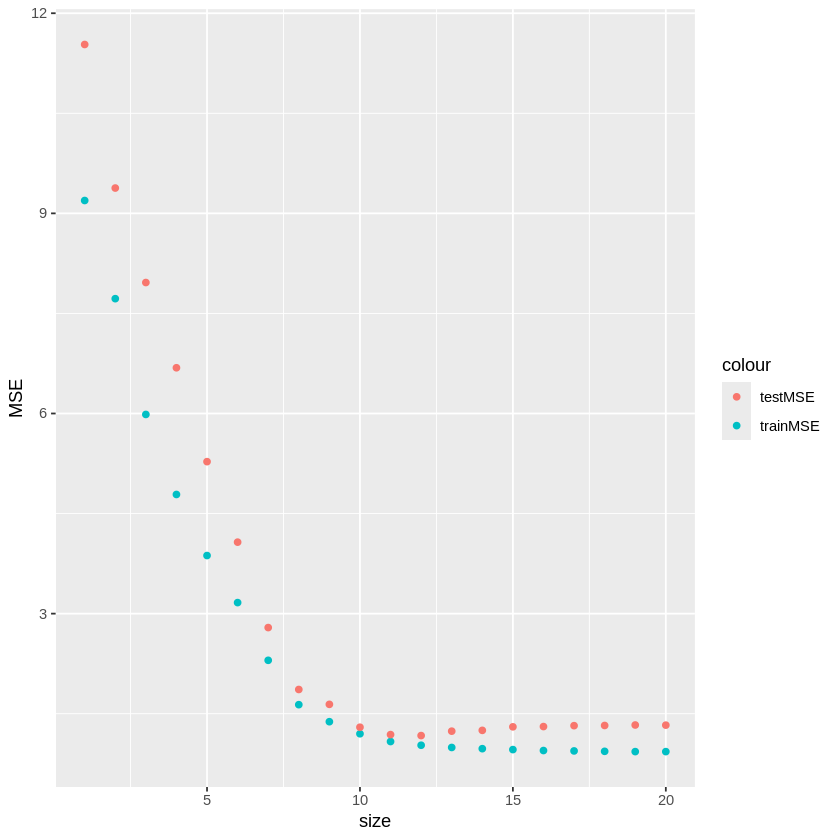

In [65]:
train.mat = model.matrix(train_y ~ ., data = training_set, nvmax = p)
trainMSE = rep(NA, 20)
for (i in 1:20) {
    coef = coef(training_fit, id = i) # get coefficients of each variable from the best model of i size
    pred = train.mat[, names(coef)] %*% coef # calculate the predicted values
    trainMSE[i] = mean((training_set$train_y - pred)^2)
}

test.mat = model.matrix(test_y ~ ., data = testing_set, nvmax = p)
testMSE = rep(NA, 20)
for (i in 1:20) {
    coef = coef(training_fit, id = i) # get coefficients of each variable from the best model of i size
    predict = test.mat[, names(coef)] %*% coef # calculate the predicted values
    testMSE[i] = mean((testing_set$test_y - predict)^2)
}

size <- seq(1, 20)
plot_df <- data.frame(trainMSE, testMSE, size)
ggplot(plot_df, aes(x = size)) +
    geom_point(aes(y = trainMSE, color = "trainMSE")) +
    geom_point(aes(y = testMSE, color = "testMSE")) +
    labs(y = "MSE")

c) Identify the best model according the test MSE. How does this model compare to the actual model used to simulate the dataset?

*Note: If the model identified contains only an intercept or all of the features, then generate a new dataset (i.e. repeat part a with a different random seed) until the test set MSE is minimized for an intermediate model size.*

In [70]:
which.min(testMSE)
set.seed(16)
beta <- rnorm(p)
beta[c(1, 3, 9, 11)] <- 0
data <- data.frame(size, beta)
# data

coef(training_fit, 12)



[1] 12

(Intercept)           X2           X4           X5           X6           X8 
 0.002640252  1.694691383  0.903370149  0.436259332 -1.272040639  1.287872945 
         X10          X12          X13          X14          X15          X19 
-1.067147175 -0.330493300  0.268392570 -1.082955994  1.419928870 -1.073996034 
         X20 
-0.433122116

> *The best model has 12 predictors, which does not contain beta1,beta3, beta9, beta11. Since these predictors were set to be zero, the best model is correct in excluding these predictors in the new dataset.*
>

**DUE:** 5pm EST, April 8, 2024

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here.
> *Letian Huang*